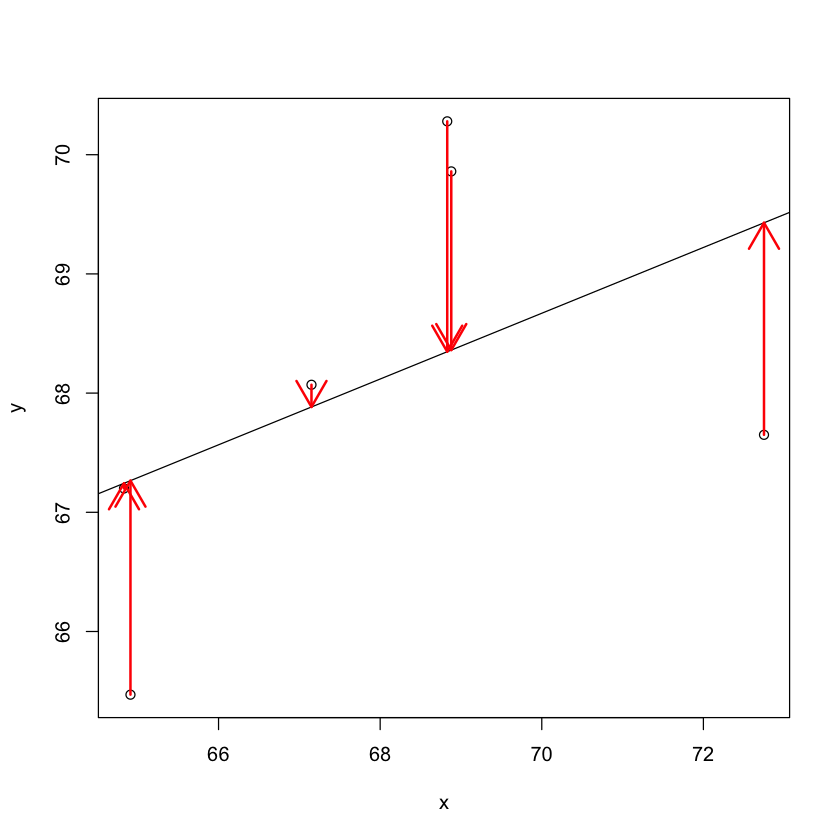

In [1]:
df = data.frame(x=c(72.75, 68.83, 68.88, 67.15, 64.83, 64.91),
                y=c(67.65, 70.28, 69.86, 68.07, 67.20, 65.47))
plot(df)
abline(lm(y~x,data=df))
arrows(df$x,df$y,df$x,predict(lm(y~x,data=df)),lwd=2, col='red')

## Minste kvadraters metode
 
$$\min_{a,b} \sum_i (y-\hat{y})^2\qquad\hat{y}_i = a + bx_i ,\  i = 1,2,\ldots,n$$

## Normalfordelings model
$$ y_i = a + bx_i + \epsilon_i\qquad \epsilon_i \sim N(0,\sigma^2)$$

eller

$$ y_i \sim N(a + bx_i,\sigma^2) $$


##### Normalfordeling
$$ N(\mu,σ2) : \phi(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2} \right) $$

## Maximum likelihood
 
 $$ L(a,b,\sigma) = \prod_i \phi(y_i -(a + bx_i),\sigma^2) $$
 
 $$\phantom{L(a,b,\sigma)} = \left( \frac{1}{\sqrt{2\pi\sigma^2}}\right)^n \exp\left(-\frac{1}{2\sigma^2} \sum_i(y_i -(a + bx_i))^2 \right) $$
 
 Det er normalt nemmer at maximere logliklighoodfunctionen
 
 $$l(a,b,\sigma) = -\frac{n}{2}\log(2\pi)-\frac{n}{2}\log(\sigma^2)-\frac{1}{\sqrt{2\pi\sigma^2}}\sum_i(y_i -(a + bx_i))^2 $$

## Løsningen

Løsningen til maximum likelihood og mindste kvadraters metode er den samme. Skrevet på matrix form ser moldellen sådan ud:

$$ Y = X\beta +\epsilon$$ 

Løsningen er:

$$ \hat{\beta} = (X^T X)^{-1}X^T Y $$

$$ s^2 = \frac{1}{n-p}(Y-X\hat{\beta})^T(Y-X\hat{\beta}) $$

$$ var(\hat{\beta}) = s^2 (X^T X)^{-1} $$



In [2]:
n = nrow(df)
Y = df$y
Y

[1] 67.65 70.28 69.86 68.07 67.20 65.47

In [3]:
dim(Y) = c(n,1)
Y

67.65
70.28
69.86
68.07
67.2
65.47


In [4]:
X = matrix(c(rep(1,n),df$x),n,2)
X

1.00,72.75
1.00,68.83
1.00,68.88
1.00,67.15
1.00,64.83
1.00,64.91


In [5]:
beta = solve(t(X) %*% X) %*% t(X) %*% Y

epsilon = Y - X %*% beta

s2 = as.vector(t(epsilon) %*% epsilon)/(n-2)

VarBeta = s2 * solve(t(X) %*% X)

beta
s2
VarBeta
sqrt(diag(VarBeta))

49.35261
0.275965


[1] 3.101914

323.444662,-4.756514
-4.75651420,0.07006035


[1] 17.9845673  0.2646892

## Linær model i R

In [6]:
m = lm(y~x,data=df)
summary(m)


Call:
lm(formula = y ~ x, data = df)

Residuals:
       1        2        3        4        5        6 
-1.77906  1.93272  1.49892  0.18634 -0.04342 -1.79550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  49.3526    17.9846   2.744   0.0517 .
x             0.2760     0.2647   1.043   0.3560  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.761 on 4 degrees of freedom
Multiple R-squared:  0.2137,	Adjusted R-squared:  0.01711 
F-statistic: 1.087 on 1 and 4 DF,  p-value: 0.356


In [7]:
model.matrix(m)

,(Intercept),x
1,1.00,72.75
2,1.00,68.83
3,1.00,68.88
4,1.00,67.15
5,1.00,64.83
6,1.00,64.91
